In [1]:
!git clone https://github.com/hzi-bifo/seminar-dlmb-2024-winter-public

Cloning into 'seminar-dlmb-2024'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 4), reused 17 (delta 1), pack-reused 0
Receiving objects: 100% (27/27), 95.32 KiB | 3.53 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
import pip

def import_or_install(package):
    try:
        __import__(package)
    except ImportError:
        pip.main(['install', package])
        __import__(package)

import_or_install('biopython')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.4 MB/s eta 0:00:00


In [4]:
import sys
sys.path.append('seminar-dlmb-2024-winter-public/src/')
# from utility.file_utility import FileUtility
from amr.amr_utility import load_gene_data, create_gene_datasets

# Loading the AMR prediction data

ds = load_gene_data("seminar-dlmb-2024-winter-public/data/ds1", "Klebsiella_pneumoniae_aztreonam", "acrR")
print(ds["test"])
print(ds["train"])

seq_train = [x[1] for x in ds["train"]]
y_train = [x[2] for x in ds["train"]]

seq_test = [x[1] for x in ds["test"]]
y_test = [x[2] for x in ds["test"]]


# # train data
# seq_train=FileUtility.load_list('/content/seminar-dlmb-2024/dataset/train_seq.txt')
# y_train=FileUtility.load_list('/content/seminar-dlmb-2024/dataset/train_label.txt')
# # test data
# seq_test=FileUtility.load_list('/content/seminar-dlmb-2024/dataset/test_seq.txt')
# y_test=FileUtility.load_list('/content/seminar-dlmb-2024/dataset/test_label.txt')

In [5]:
print('Num of samples in train data: {}'.format(len(seq_train)))
print('Num of samples in test data: {}'.format(len(seq_test)))


Num of samples in train data: 124
Num of samples in test data: 31


In [6]:
print('Input of the first element:\n{}'.format(seq_train[0]))
print('First label: {} -> non-toxic'.format(y_train[0]))

Input of the first element:
mqtmifslayiillatvsaipsgrvdivfpsletsrsgvkiikfealgqdielnlepageilakdfaivdlnnqrehltnvedlkrkiyrdsvkgaallidengpltmqgiinsklrivpyesgrvikdgriahqivelindeksyindvmpldvngvmenvvkiskkspciiidylcvtettfterfktnkelleyitvmftgvqnlldtlnlgikaqvigitpfkkqnepsfiedsaipghqqvldpvdlvknmakyycnnakglakdadiimlisnrklgelqddgtvayntagislgsgvckqcskvgvaqddsdynervdtvahetahligaphdeegpeqtgisgspgakdcpesdgyimgsgnnkvnkfkfskctkkcvehllslprascvladc
First label: 0 -> non-toxic


In [7]:
import seaborn as sns
import numpy as np

Median and mean sequence length: 87.5, 180.82258064516128


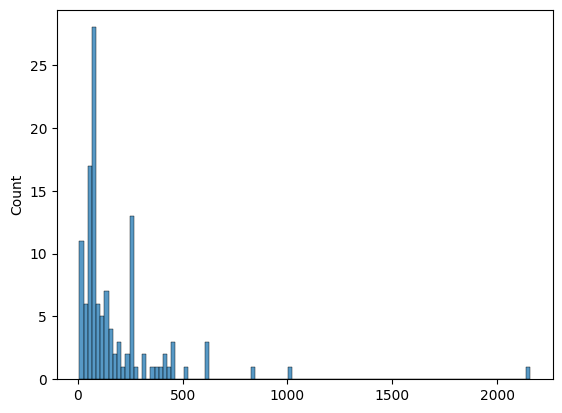

In [8]:
len_train = [len(s) for s in seq_train]
sns.histplot(len_train, binwidth=20)
median = np.median(len_train)
mean = np.mean(len_train)
print('Median and mean sequence length: {}, {}'.format(median, mean))

In [9]:
uniq_vals = set(y_train)
y_train_int = list(map(int, y_train))
print('Labels in training data')
print('Non toxic: {}'.format(y_train_int.count(0)))
print('Toxic: {}'.format(y_train_int.count(1)))

Labels in training data
Non toxic: 45
Toxic: 79


In [10]:
uniq_vals = set(y_test)
y_test_int = list(map(int, y_test))
print('Labels in test data')
print('Non toxic: {}'.format(y_test_int.count(0)))
print('Toxic: {}'.format(y_test_int.count(1)))

Labels in test data
Non toxic: 14
Toxic: 17
